# Code to build freezing degree data V3

Takes v2 FDD data and shifts all years down by 1, so 1902 becomes 1901, and 1903 becomes 1902.
2015 is now duplicate of 2014

In [1]:
from multigrids import TemporalGrid, MultiGrid, TemporalMultiGrid
from atm.images import raster
import os

data_dir = ('/Users/rwspicer/Desktop/data/V1/')
# os.listdir(data_dir)
fdd = TemporalGrid(os.path.join(data_dir, 'degree-day/freezing/ACP/v2/temporal-grid/ACP_FDD.yml'))
fdd.config['ts_offset'] = 0

tdd = TemporalGrid(os.path.join(data_dir, 'degree-day/thawing/ACP/v2/temporal-grid/ACP-TDD.yml'))
tdd.config['ts_offset'] = 0

In [5]:
tdd.config['start_timestep'], fdd.config['start_timestep']

(1901, 1901)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

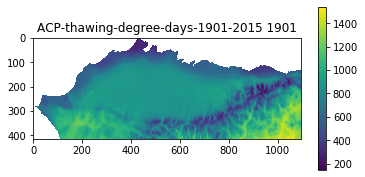

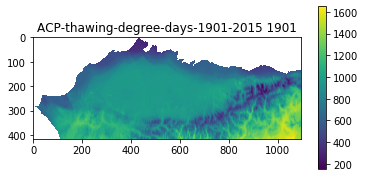

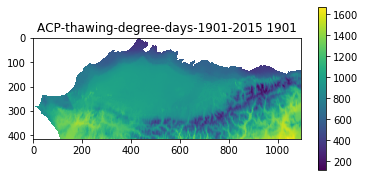

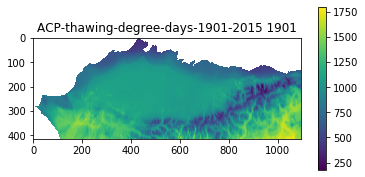

In [13]:
tdd.show_figure(1901)
tdd.show_figure(1902)
tdd.show_figure(2014)
tdd.show_figure(2015)

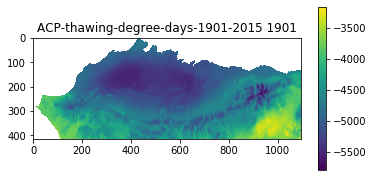

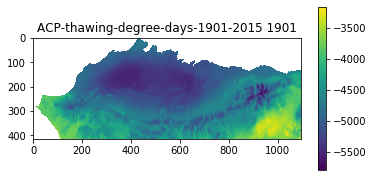

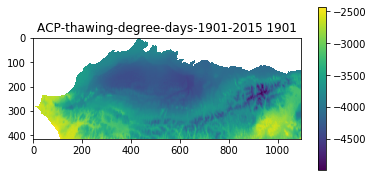

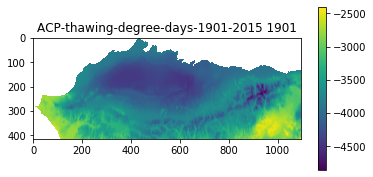

1901, 1902 equal True
2014, 2015 equal False


In [18]:
fdd.show_figure(1901)
fdd.show_figure(1902)
fdd.show_figure(2014)
fdd.show_figure(2015)

print('1901, 1902 equal', np.allclose(fdd[1901], fdd[1902], equal_nan=True))
print('2014, 2015 equal', np.allclose(fdd[2014], fdd[2015], equal_nan=True))

In [25]:
fdd_v3 = fdd.clone()
fdd_v3.grids[:-1] = fdd_v3.grids[1:]
# fdd_v3.grids[-1] = fdd_v3.grids[-2]

In [26]:
print('1901, 1902 equal', np.allclose(fdd_v3[1901], fdd_v3[1902], equal_nan=True))
print('2014, 2015 equal', np.allclose(fdd_v3[2014], fdd_v3[2015], equal_nan=True))


1901, 1902 equal False
2014, 2015 equal True


In [28]:
fdd_v3.config['dataset_name'] = 'ACP-freezing-degree-days-1901-2015'
fdd_v3.config['dataset_version']  = '3.0.0' 


In [29]:
fdd_v3.save(os.path.join(data_dir, 'degree-day/freezing/ACP/v3/temporal-grid/ACP_FDD.yml'))